# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Load dataset

In [2]:
df_brut = pd.read_csv('data/raw_2021.csv', low_memory=False)
airports_code_brut = pd.read_csv('data/airport-codes.csv')

# Clean datasets

## 0) quick view

In [3]:
df_brut

,company,flight,auth_code,line_type,origin,destination,scheduled_dep,real_dep,scheduled_arr,real_arr,situation,jus_code
0,AZU,2497,0,N,SBMO,SBRF,NaN,NaN,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO,NaN
1,AZU,2493,0,N,SBMK,SBCF,NaN,NaN,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO,NaN
2,AZU,2489,0,N,SBRF,SBGR,NaN,NaN,2019-06-07 23:35:00,2019-06-07 23:35:00,REALIZADO,NaN
3,AZU,2488,0,N,SBGR,SBRF,NaN,NaN,2019-06-07 08:20:00,2019-06-07 08:11:00,REALIZADO,NaN
4,AZU,2487,0,N,SBFL,SBKP,NaN,NaN,2019-06-07 17:45:00,2019-06-07 17:45:00,REALIZADO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1592596,AZU,2503,0,N,SBPL,SBKP,NaN,NaN,2019-06-07 06:35:00,2019-06-07 06:31:00,REALIZADO,NaN
1592597,AZU,2502,0,N,SBRF,SBSG,NaN,NaN,2019-06-07 15:25:00,2019-06-07 15:05:00,REALIZADO,HD
1592598,AZU,2500,0,N,SBKP,SBPL,NaN,NaN,2019-06-08 02:35:00,2019-06-08 02:18:00,REALIZADO,HD
1592599,AZU,2499,0,N,SBJU,SBKP,NaN,NaN,2019-06-07 05:25:00,2019-06-07 05:09:00,REALIZADO,HD


## 1) Drop useless columns

In [4]:
non_necessary_df = ['jus_code', 'scheduled_dep', 'real_dep']

In [5]:
temp_df = df_brut.copy()
temp_df = temp_df.drop(labels=non_necessary_df, axis=1)

## 2) define columns type

### a) Datetime col

In [6]:
date_cols = ['scheduled_arr', 'real_arr']

for d in date_cols:
    temp_df[d] = pd.to_datetime(temp_df[d])
    
temp_df.head(2)

,company,flight,auth_code,line_type,origin,destination,scheduled_arr,real_arr,situation
0,AZU,2497,0,N,SBMO,SBRF,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO
1,AZU,2493,0,N,SBMK,SBCF,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO


## 3) Delete 'non realizado' flight

In [7]:
def n_rows_deleted(df_init, df_final):
    n_rows = abs(df_init.shape[0] - df_final.shape[0])
    print("{} rows have been deleted".format(n_rows))

In [8]:
temp_df = temp_df.loc[temp_df['situation'] == 'REALIZADO']
n_rows_deleted(df_brut, temp_df)

38309 rows have been deleted


## 4) Delete outrange date 

In [9]:
def looking_for_dt(df):
    tmin = df['real_arr'].min()
    tmax = df['real_arr'].max()
    print("t min = {} \nt max = {}".format(tmin, tmax))

    dt = tmax - tmin
    print("dt = {}".format(dt))
    
    return tmin, tmax, dt

In [10]:
looking_for_dt(temp_df)

t min = 2017-10-21 09:35:00 
t max = 2202-02-18 13:59:00
dt = 67324 days 04:24:00


(Timestamp('2017-10-21 09:35:00'),
 Timestamp('2202-02-18 13:59:00'),
 Timedelta('67324 days 04:24:00'))

In [11]:
split_date = datetime.datetime(2021,8,1)
temp_df = temp_df.loc[temp_df['real_arr'] < split_date]

In [12]:
looking_for_dt(temp_df)

t min = 2017-10-21 09:35:00 
t max = 2021-07-01 20:26:00
dt = 1349 days 10:51:00


(Timestamp('2017-10-21 09:35:00'),
 Timestamp('2021-07-01 20:26:00'),
 Timedelta('1349 days 10:51:00'))

In [13]:
n_rows_deleted(df_brut, temp_df)

46382 rows have been deleted


## 5) Create new columns

### a) Month

In [14]:
temp_df['month'] = temp_df['real_arr'].dt.month
temp_df.head(2)

,company,flight,auth_code,line_type,origin,destination,scheduled_arr,real_arr,situation,month
0,AZU,2497,0,N,SBMO,SBRF,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO,6
1,AZU,2493,0,N,SBMK,SBCF,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO,6


### b) Hour

In [15]:
temp_df['hour'] = temp_df['real_arr'].dt.hour
temp_df.head(2)

,company,flight,auth_code,line_type,origin,destination,scheduled_arr,real_arr,situation,month,hour
0,AZU,2497,0,N,SBMO,SBRF,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO,6,21
1,AZU,2493,0,N,SBMK,SBCF,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO,6,20


### c) dt_arr_min

In [16]:
temp_df['dt_arr'] = (temp_df['scheduled_arr'] - temp_df['real_arr'])
temp_df['dt_arr_min'] = temp_df['dt_arr'] / np.timedelta64(1, 'm')
temp_df.head(3)

,company,flight,auth_code,line_type,origin,destination,scheduled_arr,real_arr,situation,month,hour,dt_arr,dt_arr_min
0,AZU,2497,0,N,SBMO,SBRF,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO,6,21,0 days 00:11:00,11.0
1,AZU,2493,0,N,SBMK,SBCF,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO,6,20,0 days 00:00:00,0.0
2,AZU,2489,0,N,SBRF,SBGR,2019-06-07 23:35:00,2019-06-07 23:35:00,REALIZADO,6,23,0 days 00:00:00,0.0


### d) late

In [17]:
#temp_df['late'] = temp_df['dt_arr_min'] < 0
temp_df['late'] = temp_df['dt_arr_min'].apply(lambda x: 1 if x < 0 else 0)

## 6) NaN values ?

In [18]:
temp_df.isna().sum()

company             0
flight              0
auth_code         636
line_type           0
origin              0
destination         0
scheduled_arr    2451
real_arr            0
situation           0
month               0
hour                0
dt_arr           2451
dt_arr_min       2451
late                0
dtype: int64

In [19]:
temp_df[temp_df['scheduled_arr'].isna()]

,company,flight,auth_code,line_type,origin,destination,scheduled_arr,real_arr,situation,month,hour,dt_arr,dt_arr_min,late
539629,TAM,9007,1,N,SBGR,SBFZ,NaT,2020-04-11 13:07:00,REALIZADO,4,13,NaT,NaN,0
539931,TAM,9008,1,N,SBFZ,SBGR,NaT,2020-04-11 17:47:00,REALIZADO,4,17,NaT,NaN,0
540082,TAM,9008,1,N,SBGR,SBMO,NaT,2020-04-12 16:44:00,REALIZADO,4,16,NaT,NaN,0
541362,TAM,9008,1,N,SBMO,SBRF,NaT,2020-04-12 18:11:00,REALIZADO,4,18,NaT,NaN,0
541815,TAM,9009,1,N,SBRF,SBGR,NaT,2020-04-12 22:21:00,REALIZADO,4,22,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129564,OWT,5983,6,N,SBVT,SBJD,NaT,2021-06-07 00:00:00,REALIZADO,6,0,NaT,NaN,0
1129565,OWT,5984,6,N,SBJD,SBJD,NaT,2021-06-26 16:50:00,REALIZADO,6,16,NaT,NaN,0
1129566,OWT,5985,6,N,SBGO,SBJD,NaT,2021-06-27 03:43:00,REALIZADO,6,3,NaT,NaN,0
1129567,OWT,5985,6,N,SBCY,SBGO,NaT,2021-06-27 00:18:00,REALIZADO,6,0,NaT,NaN,0


## 6-bis) drop NaN rows

In [20]:
temp_df = temp_df.dropna()

In [21]:
temp_df.isna().sum()

company          0
flight           0
auth_code        0
line_type        0
origin           0
destination      0
scheduled_arr    0
real_arr         0
situation        0
month            0
hour             0
dt_arr           0
dt_arr_min       0
late             0
dtype: int64

## 7) Set df

In [22]:
df = temp_df.copy()

# Keep 3 busiest airports

In [23]:
d = df.groupby(['origin'])['origin'].count()
d = d.sort_values(ascending=False)

top_20 = d.iloc[0:5]
list_top_20 = list(top_20.index)
list_top_20

['SBGR', 'SBSP', 'SBKP', 'SBBR', 'SBCF']

In [24]:
df_top_20 =df[df['origin'].isin(list_top_20)]

In [25]:
df_top_20.head()

,company,flight,auth_code,line_type,origin,destination,scheduled_arr,real_arr,situation,month,hour,dt_arr,dt_arr_min,late
3,AZU,2488,0,N,SBGR,SBRF,2019-06-07 08:20:00,2019-06-07 08:11:00,REALIZADO,6,8,0 days 00:09:00,9.0,0
6,AZU,2483,0,N,SBCF,SBKP,2019-06-07 13:45:00,2019-06-07 13:40:00,REALIZADO,6,13,0 days 00:05:00,5.0,0
7,AZU,2482,0,N,SBKP,SBCF,2019-06-07 20:10:00,2019-06-07 20:10:00,REALIZADO,6,20,0 days 00:00:00,0.0,0
8,AZU,2480,0,N,SBGR,SBCY,2019-06-07 15:05:00,2019-06-07 15:03:00,REALIZADO,6,15,0 days 00:02:00,2.0,0
14,AZU,2476,0,N,SBSP,SBPA,2019-06-07 21:35:00,2019-06-07 21:30:00,REALIZADO,6,21,0 days 00:05:00,5.0,0


In [26]:
df_top_20.shape

(630721, 14)

# Machine Learning - Light df

In [27]:
df_light = df_top_20.sample(n=50000)

## Split

In [28]:
from sklearn.model_selection import train_test_split

X = df_light.drop('late', axis=1)
y = df_light['late']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## Preprocessing

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

numerical_features = ['month', 'hour']
categorical_features = ['origin', 'destination','flight', 'company']
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown = "ignore"))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                       (categorical_pipeline, categorical_features))

## Model selection

In [30]:
from sklearn.model_selection import cross_validate

def crossVal_model(preprocessor, estimator, X_train, y_train):
    
    #model
    model = make_pipeline(preprocessor, estimator)
    
    #cross validation
    scr = cross_validate(model, X_train, y_train, cv=5, scoring=['f1', 'precision', 'recall'])
    
    #metrics
    print("reacall = {:.0%}".format(scr['test_recall'].mean()))
    print("precision = {:.0%}".format(scr['test_precision'].mean()))
    print("f1 = {:.0%}".format(scr['test_f1'].mean()))
    
    return model, scr

### Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
m_tree = crossVal_model(preprocessor, estimator, X_train, y_train)

reacall = 37%
precision = 50%
f1 = 42%


### Stochastic Gradient Descent

In [32]:
from sklearn.linear_model import SGDClassifier

estimator = SGDClassifier()
m_sgdc = crossVal_model(preprocessor, estimator, X_train, y_train)

reacall = 12%
precision = 54%
f1 = 19%


### K nearest neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
m_kn = crossVal_model(preprocessor, estimator, X_train, y_train)

reacall = 29%
precision = 45%
f1 = 36%


### Linear SVC

In [34]:
from sklearn.svm import LinearSVC

estimator = LinearSVC()
m_svc = crossVal_model(preprocessor, estimator, X_train, y_train)

reacall = 20%
precision = 48%
f1 = 29%


## test

recall = 39%
precision = 52%
f1 = 44%


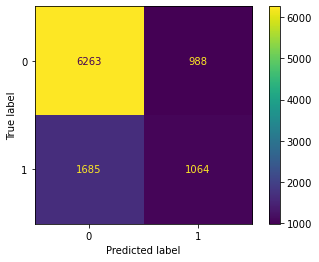

In [35]:
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score

model = m_tree[0]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test);

p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('recall = {:.0%}'.format(r))
print('precision = {:.0%}'.format(p))
print('f1 = {:.0%}'.format(f1))

# Large Scale deployment

recall = 49%
precision = 73%
f1 = 58%


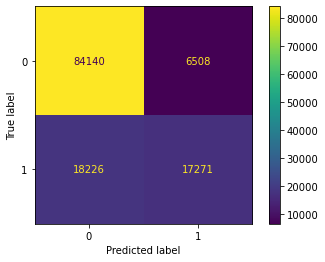

In [36]:
X = df_top_20.drop('late', axis=1)
y = df_top_20['late']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_confusion_matrix(model, X_test, y_test);
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('recall = {:.0%}'.format(r))
print('precision = {:.0%}'.format(p))
print('f1 = {:.0%}'.format(f1))

In [37]:
y_pred[100:120]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [38]:
np.array(y_test[100:120])

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])